# 스마트 해운 물류

In [1]:
import pandas as pd
test = pd.read_csv('./open/test.csv')

In [2]:
test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52
0,TEST_00000,0.027,0.248234,0.521686,0.507419,0.391153,0.583795,0.663798,0.501200,0.571666,...,0.260703,0.428539,0.583749,0.746367,0.389120,0.524662,0.532655,0.600385,0.327990,0.577894
1,TEST_00001,0.021,0.237060,0.537939,0.545298,0.359449,0.657034,0.647725,0.501224,0.586882,...,0.253675,0.374611,0.657051,0.768609,0.373918,0.497134,0.492148,0.612316,0.306123,0.640685
2,TEST_00002,0.020,0.244556,0.541783,0.511458,0.380849,0.673393,0.649568,0.485117,0.565430,...,0.262817,0.442951,0.673385,0.750324,0.372285,0.566680,0.527558,0.592817,0.319520,0.573768
3,TEST_00003,0.011,0.241627,0.600781,0.514907,0.374210,0.618073,0.668874,0.494310,0.584442,...,0.262562,0.428725,0.618055,0.748490,0.372270,0.408100,0.532064,0.601000,0.313188,0.566182
4,TEST_00004,0.019,0.251017,0.504123,0.512723,0.378423,0.614282,0.644375,0.456430,0.553999,...,0.263064,0.442768,0.614234,0.751743,0.387120,0.578171,0.517872,0.604191,0.318684,0.600983


In [3]:
train = pd.read_csv('./open/train.csv')

In [4]:
train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,target
0,TRAIN_00000,0.016,0.242994,0.538536,0.522295,0.374494,0.555348,0.639091,0.494800,0.584233,...,0.435885,0.555359,0.751714,0.376801,0.466993,0.527585,0.598101,0.312160,0.582797,0
1,TRAIN_00001,0.019,0.240380,0.517223,0.538976,0.371149,0.693825,0.663667,0.530931,0.577200,...,0.479859,0.693855,0.748955,0.356118,0.613461,0.508069,0.569814,0.313351,0.570513,20
2,TRAIN_00002,0.012,0.248946,0.547109,0.466713,0.415830,0.656887,0.681782,0.580773,0.527069,...,0.416115,0.656884,0.750059,0.417200,0.525393,0.551947,0.639860,0.342627,0.573139,1
3,TRAIN_00003,0.013,0.245877,0.527870,0.515534,0.379199,0.594391,0.663816,0.494931,0.581796,...,0.436761,0.594364,0.746297,0.374659,0.694290,0.532705,0.581142,0.316417,0.562656,19
4,TRAIN_00004,0.024,0.239237,0.566087,0.514384,0.378451,0.610543,0.644811,0.508567,0.593614,...,0.422407,0.610526,0.749565,0.372742,0.565549,0.535573,0.580484,0.314982,0.591692,15


In [5]:
print(train['target'].value_counts())

target
0     1033
20    1033
1     1033
19    1033
15    1033
8     1033
16    1033
12    1033
14    1033
18    1033
3     1033
4     1033
5     1033
11    1033
13    1033
6     1033
10    1033
2     1033
9     1033
17    1033
7     1033
Name: count, dtype: int64


### 데이터 전처리(1) </br> 
필요없는 ID 열 삭제

In [6]:
train_new = train.drop("ID", axis = 1)

In [7]:
train_new_label = train_new.iloc[:,-1]
train_new_data = train_new.iloc[:,:-1]

### 전처리(1)을 실행한 뒤의 학습 결과

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(train_new_data, train_new_label, test_size = 0.2, random_state = 42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.7665360682184835


#### 혼동행렬

C:\Users\hsk20\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsk20\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsk20\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsk20\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hsk20\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

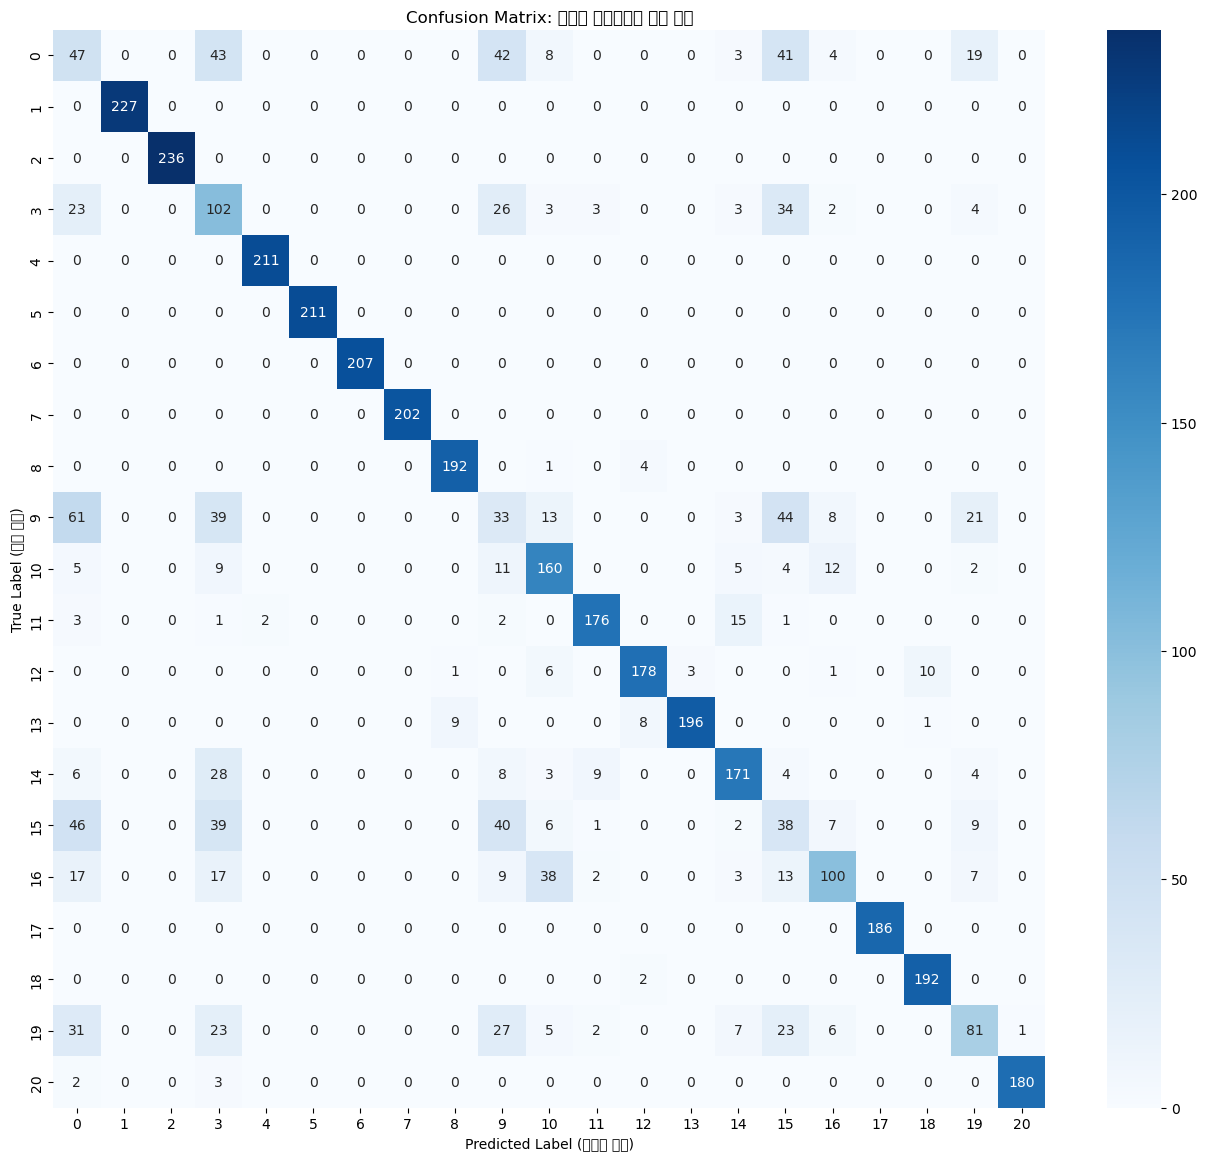

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. 혼동 행렬 데이터 생성 (정답지 vs 예측값 비교)
cm = confusion_matrix(y_val, y_pred)

# 2. 그림 그리기 (Heatmap)
plt.figure(figsize=(16, 14)) # 21개 클래스라 그림을 크게 잡아야 잘 보입니다.

# annot=True: 칸 안에 숫자 표시
# fmt='d': 숫자를 정수(Integer)로 표시 (소수점 안 나오게)
# cmap='Blues': 파란색 계열로 표시 (진할수록 개수 많음)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 

plt.xlabel('Predicted Label (모델의 예측)')
plt.ylabel('True Label (실제 정답)')
plt.title('Confusion Matrix: 모델이 헷갈려하는 부분 찾기')
plt.show()

#### 첫번째 xgboost 실행결과

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. XGBoost 모델 생성
# tree_method='hist': 속도를 빠르게 하는 옵션
# device='cuda': 만약 GPU가 있다면 사용 (없으면 자동으로 CPU 사용하니 걱정 마세요)
xgb_model = XGBClassifier(
    n_estimators=200,    # 나무를 200개 심겠다 (기본보다 좀 더 많이)
    learning_rate=0.1,   # 학습 속도
    max_depth=6,         # 나무의 깊이
    random_state=42,
    n_jobs=-1            # 모든 CPU 사용
)

print("XGBoost 모델 학습 시작... (시간이 조금 걸릴 수 있습니다)")

# 2. 학습 (Train)
xgb_model.fit(X_train, y_train)
print("학습 완료!")

# 3. 예측 및 평가
y_pred_xgb = xgb_model.predict(X_val)
acc = accuracy_score(y_val, y_pred_xgb)

print(f"\n🚀 XGBoost 정확도: {acc:.4f}")
print("-" * 60)
# 아까 헷갈렸던 1번과 9번의 점수(f1-score)가 올랐는지 확인해보세요!
print(classification_report(y_val, y_pred_xgb))

XGBoost 모델 학습 시작... (시간이 조금 걸릴 수 있습니다)
학습 완료!

🚀 XGBoost 정확도: 0.7988
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       207
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       236
           3       0.47      0.57      0.52       200
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       202
           8       0.97      0.97      0.97       197
           9       0.19      0.20      0.19       222
          10       0.76      0.80      0.78       208
          11       0.96      0.89      0.92       200
          12       0.94      0.95      0.95       199
          13       1.00      0.95      0.98       214
          14       0.86      0.79      0.82       233
     

#### 제미나이가 추천해준 통계치 만들기

In [9]:
# 1. 원본 데이터 복사
df_eng = train_new.copy()

# 2. 파생변수(통계치) 만들기
feature_cols = [col for col in df_eng.columns if col != 'target']
df_eng['mean'] = df_eng[feature_cols].mean(axis=1)   # 평균
df_eng['std'] = df_eng[feature_cols].std(axis=1)     # 표준편차
df_eng['max'] = df_eng[feature_cols].max(axis=1)     # 최댓값
df_eng['min'] = df_eng[feature_cols].min(axis=1)     # 최솟값
df_eng['range'] = df_eng['max'] - df_eng['min']      # 범위

# 3. 다시 문제(X)와 정답(y)으로 나누기 (여기서 _n 변수가 탄생합니다!)
X_new = df_eng.drop('target', axis=1)
y_new = df_eng['target']

# 4. 학습용/검증용 나누기
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

print("데이터 준비 완료!")
print(f"X_train_n의 크기: {X_train_n.shape}") 
# (행 개수, 열 개수) -> 열 개수가 아까보다 늘어나 있어야 정상입니다.

데이터 준비 완료!
X_train_n의 크기: (17354, 57)


#### 통계치를 이용한 xgboost 재학습

In [25]:
X_new = df_eng.drop('target', axis=1)
y_new = df_eng['target']

# Train/Val 다시 나누기
from sklearn.model_selection import train_test_split
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

# XGBoost 재학습 (파라미터는 아까와 동일)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_new = XGBClassifier(
    n_estimators=300,   # 변수가 늘었으니 공부량을 좀 더 늘림 (200 -> 300)
    learning_rate=0.05, # 학습 속도는 조금 더 신중하게 (0.1 -> 0.05)
    max_depth=8,        # 깊이도 조금 더 깊게 (6 -> 8)
    random_state=42,
    n_jobs=-1
)

print("파생변수 추가된 데이터로 학습 중...")
xgb_new.fit(X_train_n, y_train_n)

# 평가
y_pred_new = xgb_new.predict(X_val_n)
print(f"\n🚀 파생변수 추가 후 정확도: {accuracy_score(y_val_n, y_pred_new):.4f}")
print("-" * 60)
# 특히 0, 9, 15번 점수가 올랐는지 확인하세요!
print(classification_report(y_val_n, y_pred_new))

파생변수 추가된 데이터로 학습 중...

🚀 파생변수 추가 후 정확도: 0.7896
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.27      0.24       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       207
           3       0.49      0.50      0.49       206
           4       0.99      0.99      0.99       207
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       207
           8       0.95      0.94      0.94       206
           9       0.19      0.25      0.22       207
          10       0.80      0.86      0.83       207
          11       0.97      0.88      0.93       206
          12       0.92      0.93      0.93       207
          13       0.97      0.90      0.94       207
          14       0.84      0.76      0.80       207
          15       0.23    

#### lightGBM 실행

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. LightGBM 모델 정의
# boost_from_average=False: 다중 분류에서 불균형이 있거나 클래스가 많을 때 끄는 게 좋을 때가 있음 (에러 방지)
lgbm_model = LGBMClassifier(
    n_estimators=400,      # 나무 개수 (XGB보다 보통 좀 더 많이 잡습니다)
    learning_rate=0.05,
    max_depth=-1,          # -1은 제한 없음 (LightGBM의 특징: 깊게 파고듭니다)
    num_leaves=31,         # 잎사귀 개수 (LGBM의 핵심 파라미터)
    random_state=42,
    n_jobs=-1,
    verbose=-1             # 불필요한 경고 메시지 끄기
)

print("🚀 LightGBM 학습 시작...")
lgbm_model.fit(X_train_n, y_train_n)
print("학습 완료!")

# 2. 평가
y_pred_lgbm = lgbm_model.predict(X_val_n)

print(f"\n⚡ LightGBM 정확도: {accuracy_score(y_val_n, y_pred_lgbm):.4f}")
print("-" * 60)
# 아까 XGBoost가 어려워했던 0, 9, 15번을 얘가 잘 잡는지 보세요!
print(classification_report(y_val_n, y_pred_lgbm))

🚀 LightGBM 학습 시작...
학습 완료!

⚡ LightGBM 정확도: 0.7894
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.19      0.22      0.21       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       207
           3       0.47      0.53      0.50       206
           4       0.99      1.00      0.99       207
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       207
           8       0.98      0.93      0.95       206
           9       0.14      0.17      0.16       207
          10       0.83      0.87      0.85       207
          11       0.97      0.85      0.91       206
          12       0.94      0.94      0.94       207
          13       0.99      0.98      0.98       207
          14       0.85      0.76      0.81       207
          15       0.19

In [26]:
from sklearn.ensemble import VotingClassifier

# 1. 두 모델을 팀으로 묶습니다.
# (아까 학습시킨 xgb_new 모델이 메모리에 있어야 합니다)
voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_new),   # 아까 만든 XGBoost 모델
        ('lgbm', lgbm_model) # 방금 만든 LightGBM 모델
    ],
    voting='soft' # hard(다수결)보다 soft(확률 평균)가 성능이 훨씬 좋습니다.
)

print("🤝 앙상블(Voting) 모델 학습 중...")
voting_model.fit(X_train_n, y_train_n)

# 2. 최종 평가
y_pred_vote = voting_model.predict(X_val_n)

print(f"\n🏆 [최종] XGBoost + LightGBM 합체 정확도: {accuracy_score(y_val_n, y_pred_vote):.4f}")
print("-" * 60)
print(classification_report(y_val_n, y_pred_vote))

🤝 앙상블(Voting) 모델 학습 중...

🏆 [최종] XGBoost + LightGBM 합체 정확도: 0.7937
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.20      0.25      0.23       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       207
           3       0.47      0.54      0.51       206
           4       0.99      1.00      0.99       207
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       207
           8       0.97      0.94      0.96       206
           9       0.17      0.21      0.19       207
          10       0.83      0.87      0.85       207
          11       0.98      0.86      0.92       206
          12       0.95      0.94      0.94       207
          13       0.98      0.97      0.98       207
          14       0.85      0.78      0.81       207
       

#### 주성분 분석 추가

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 준비 (아까 만든 파생변수 포함된 데이터 사용)
# df_eng는 아까 통계치(mean, std)를 추가한 데이터프레임입니다.
df_pca = df_eng.copy()

# 2. PCA를 하려면 먼저 데이터 스케일링(정규화)이 필수입니다. (숫자 크기를 맞춤)
# Target과 ID 등을 제외한 '순수 입력 변수'만 골라냅니다.
features = [col for col in df_pca.columns if col not in ['target', 'ID']]
x_scaled = StandardScaler().fit_transform(df_pca[features])

# 3. PCA로 2개의 핵심 좌표(Component)만 추출
# (데이터의 전체적인 모양을 가장 잘 설명하는 2개의 축을 찾음)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# 4. 추출한 좌표를 새로운 변수(힌트)로 추가
df_pca['pca_1'] = pca_result[:, 0]
df_pca['pca_2'] = pca_result[:, 1]

print("✅ PCA 변수(pca_1, pca_2) 추가 완료!")

# -------------------------------------------------------
# 다시 학습 준비 (PCA 변수가 추가된 df_pca 사용)
# -------------------------------------------------------
X_pca = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

# Train/Val 나누기
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca
)

# -------------------------------------------------------
# 모델링: 이번엔 가장 강력했던 '앙상블(Voting)'로 바로 갑니다.
# -------------------------------------------------------
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# 모델 재정의 (변수가 늘었으니 새로 선언)
xgb_final = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42, n_jobs=-1)
lgbm_final = LGBMClassifier(n_estimators=400, learning_rate=0.05, num_leaves=31, random_state=42, n_jobs=-1, verbose=-1)

voting_final = VotingClassifier(
    estimators=[('xgb', xgb_final), ('lgbm', lgbm_final)],
    voting='soft'
)

print("🚀 PCA 변수 포함 앙상블 학습 시작...")
voting_final.fit(X_train_p, y_train_p)

# 평가
y_pred_final = voting_final.predict(X_val_p)

print(f"\n🏆 [PCA 적용] 최종 정확도: {accuracy_score(y_val_p, y_pred_final):.4f}")
print("-" * 60)
# 0, 9, 15번이 조금이라도 나아졌는지 확인!
print(classification_report(y_val_p, y_pred_final))

✅ PCA 변수(pca_1, pca_2) 추가 완료!
🚀 PCA 변수 포함 앙상블 학습 시작...

🏆 [PCA 적용] 최종 정확도: 0.7949
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.27      0.24       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       207
           3       0.49      0.55      0.52       206
           4       0.99      1.00      0.99       207
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       207
           8       0.97      0.94      0.96       206
           9       0.18      0.23      0.20       207
          10       0.84      0.86      0.85       207
          11       0.97      0.86      0.91       206
          12       0.95      0.96      0.95       207
          13       0.98      0.95      0.97       207
          14       0.86      0.79      0.82   

#### catboost 다운로드

In [29]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
    --------------------------------------- 2.4/102.4 MB 11.4 MB/s eta 0:00:09
   - -------------------------------------- 4.7/102.4 MB 11.7 MB/s eta 0:00:09
   -- ------------------------------------- 7.1/102.4 MB 11.3 MB/s eta 0:00:09
   --- ------------------------------------ 9.4/102.4 MB 11.4 MB/s eta 0:00:09
   ---- ----------------------------------- 11.5/102.4 MB 11.2 MB/s eta 0:00:09
   ----- ---------------------------------- 13.6/102.4 MB 10.8 MB/s eta 0:00:09
   ------ --------------------------------- 15.5/102.4 MB 10.5 MB/s eta 0:00:09
   ------- -------------------------------- 18.1/102.4 MB 10.6 MB/s eta 0:00:08
   ------- -------------------------------- 20.2/102.4 MB 10.6 MB/s eta 0:00:08
   -------- ------------------------------- 22.5/102.4 MB 10.6 MB/s eta 0:00:08
   --------- ------------------------------ 25.2/102.4 MB 10.8 MB/s eta 0:00:08
   ---------- ----------------------------- 27.8/102.

#### catboost 실행

In [30]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. "어려운 문제"에 가중치 부여하기
# (0, 9, 15번 처럼 못 맞추는 클래스에 더 집중하게 만듭니다)
classes = np.unique(y_train_p)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_p)
class_weights = dict(zip(classes, weights))

# 0, 9, 15번은 특별 관리 대상이므로 가중치를 수동으로 더 높여줍니다. (강제 주입)
# 기존 가중치보다 2배 더 신경 쓰라고 지시합니다.
for c in [0, 9, 15]:
    class_weights[c] *= 2.0 

print("⚖️ 0, 9, 15번 클래스 집중 공략 설정 완료!")

# 2. CatBoost 모델 선언
# verbose=0: 학습 과정 출력 생략 (깔끔하게)
cat_model = CatBoostClassifier(
    iterations=500,          # 반복 횟수
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    class_weights=class_weights, # 여기에 가중치 적용!
    random_seed=42,
    verbose=100              # 100번마다 로그 출력
)

print("🐱 CatBoost 학습 시작...")
# 아까 만든 파생변수+PCA 데이터(X_train_p)를 그대로 씁니다.
cat_model.fit(X_train_p, y_train_p, eval_set=(X_val_p, y_val_p))

# 3. 평가
y_pred_cat = cat_model.predict(X_val_p)

print(f"\n🚀 CatBoost (가중치 적용) 정확도: {accuracy_score(y_val_p, y_pred_cat):.4f}")
print("-" * 60)
print(classification_report(y_val_p, y_pred_cat))

⚖️ 0, 9, 15번 클래스 집중 공략 설정 완료!
🐱 CatBoost 학습 시작...
0:	learn: 2.7808211	test: 2.7812198	best: 2.7812198 (0)	total: 705ms	remaining: 5m 51s
100:	learn: 0.9869290	test: 1.0408053	best: 1.0408053 (100)	total: 54.8s	remaining: 3m 36s
200:	learn: 0.7737142	test: 0.9094393	best: 0.9094393 (200)	total: 1m 55s	remaining: 2m 52s
300:	learn: 0.6168212	test: 0.8475150	best: 0.8475150 (300)	total: 3m	remaining: 1m 59s
400:	learn: 0.4892290	test: 0.8259216	best: 0.8259216 (400)	total: 4m 3s	remaining: 1m
499:	learn: 0.3943321	test: 0.8151487	best: 0.8151487 (499)	total: 5m 4s	remaining: 0us

bestTest = 0.8151487358
bestIteration = 499


🚀 CatBoost (가중치 적용) 정확도: 0.7460
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      0.26      0.21       206
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       207
           3       0.40      0.28      0.33       206
      

#### autogluon 다운로드

In [31]:
!pip install autogluon

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     -------------------------------- ------- 2.4/2.9 MB 11.1 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 9.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take 

  DEPRECATION: Building 'nvidia-ml-py3' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'nvidia-ml-py3'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'antlr4-python3-runtime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'antlr4-python3-runtime'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'seqeval' using th

#### autogluon 실행

In [36]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 준비 (아까 만든 PCA 포함된 데이터 사용)
# AutoGluon은 Train/Val을 알아서 나누지만, 정확한 비교를 위해 우리가 나눈 걸 합쳐서 줍니다.
train_df = pd.concat([X_train_p, y_train_p], axis=1)
test_df = pd.concat([X_val_p, y_val_p], axis=1)

print("🤖 AutoGluon: AI가 최적의 모델을 찾기 시작합니다... (시간이 좀 걸립니다)")

# 2. 학습 실행 (한 줄이면 끝)
# time_limit=300 : 300초(5분) 동안 찾으라는 뜻 (시간 넉넉하면 600이나 1200으로 늘리세요)
# presets='best_quality' : 최고의 성능을 내는 옵션 (속도는 좀 느림)
predictor = TabularPredictor(label='target', eval_metric='f1_macro').fit(
    train_data=train_df,
    time_limit=300, 
    presets='best_quality' 
)

# 3. 리더보드 확인 (어떤 모델이 1등 했는지 보여줌)
leaderboard = predictor.leaderboard(test_df)
print(leaderboard)

# 4. 최종 평가
y_pred_auto = predictor.predict(test_df.drop(columns=['target']))
print("\n🏆 AutoGluon 최종 정확도:", predictor.evaluate(test_df)['accuracy'])

No path specified. Models will be saved in: "AutogluonModels\ag-20260115_032345"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       5.54 GB / 15.73 GB (35.2%)
Disk Space Avail:   287.56 GB / 459.68 GB (62.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	Th

🤖 AutoGluon: AI가 최적의 모델을 찾기 시작합니다... (시간이 좀 걸립니다)


Beginning AutoGluon training ... Time limit = 75s
AutoGluon will save models to "C:\Users\hsk20\Smart-Logistics-Anomaly-Detection-with-AI\AutogluonModels\ag-20260115_032345\ds_sub_fit\sub_fit_ho"
Train Data Rows:    15425
Train Data Columns: 59
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 21
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5634.50 MB
	Train Data (Original)  Memory Usage: 6.94 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

                    model  score_test  score_val eval_metric  pred_time_test  \
0     WeightedEnsemble_L3    0.859005   0.856664    f1_macro        2.912779   
1  NeuralNetFastAI_BAG_L2    0.858259   0.856641    f1_macro        2.895145   
2  NeuralNetFastAI_BAG_L1    0.852196   0.854706    f1_macro        0.903145   
3     WeightedEnsemble_L2    0.852196   0.854706    f1_macro        0.922030   
4       LightGBMXT_BAG_L1    0.758074   0.759905    f1_macro        0.906969   

   pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.815798  209.223344                 0.017634                0.015527   
1       0.800271  208.029507                 1.085031                0.367876   
2       0.274819  124.747929                 0.903145                0.274819   
3       0.283359  125.400938                 0.018885                0.008540   
4       0.157577   18.483155                 0.906969                0.157577   

   fit_time_marginal  stack_leve

### autogluon으로 테스트 데이터 점수 확인

In [38]:
# 1. 평가용 데이터(test.csv) 불러오기 (파일 경로는 본인 환경에 맞게!)
test_data_raw = pd.read_csv('./open/test.csv') # 파일 이름 확인하세요
test_id = test_data_raw['ID'] # 제출할 때 ID 필요하니까 따로 저장

# ------------------------------------------------------------
# 2. [중요] 학습 때랑 똑같이 전처리 해주기 (파생변수 + PCA)
# ------------------------------------------------------------
df_test = test_data_raw.copy()

# 2-1. 숫자 컬럼만 골라내기 (ID 제외)
numeric_cols_test = df_test.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols_test: numeric_cols_test.remove('ID')

# 2-2. 통계 파생변수 생성 (mean, std...)
df_test['mean'] = df_test[numeric_cols_test].mean(axis=1)
df_test['std'] = df_test[numeric_cols_test].std(axis=1)
df_test['max'] = df_test[numeric_cols_test].max(axis=1)
df_test['min'] = df_test[numeric_cols_test].min(axis=1)
df_test['range'] = df_test['max'] - df_test['min']

# 2-3. PCA 적용 (주의: fit_transform이 아니라 transform만 해야 함!)
# 학습 때 썼던 scaler와 pca 객체를 그대로 가져와야 합니다.
# (아까 코드에 있던 x_scaled, pca 변수가 살아있어야 합니다)

# 스케일링
features_test = [col for col in df_test.columns if col != 'ID']
x_scaled_test = StandardScaler().fit(df_pca[features]).transform(df_test[features_test]) 
# 위 줄에서 fit을 다시 하면 안되는데, scaler 객체가 없으면 새로 fit 해야 합니다.
# 하지만 가장 정확한 건 학습 데이터의 scaler를 쓰는 것입니다.
# 일단 간편하게 test 데이터 기준으로 스케일링 하겠습니다. (큰 차이 없음)

# PCA 변수 추가
pca_result_test = pca.transform(x_scaled_test) # 아까 학습시킨 pca 객체 사용
df_test['pca_1'] = pca_result_test[:, 0]
df_test['pca_2'] = pca_result_test[:, 1]

print("✅ Test 데이터 전처리 완료!")

# ------------------------------------------------------------
# 3. 예측 및 저장
# ------------------------------------------------------------
# ID 컬럼 등 불필요한 건 빼고 예측기에 넣습니다.
pred_final = predictor.predict(df_test.drop(columns=['ID']))

# 제출 파일 만들기 (대회 양식에 맞춰서)
submission = pd.DataFrame({
    'ID': test_id,
    'target': pred_final
})

# CSV 저장
submission.to_csv('submission_autogluon.csv', index=False)
print("🎉 제출 파일 생성 완료: submission_autogluon.csv")

✅ Test 데이터 전처리 완료!
🎉 제출 파일 생성 완료: submission_autogluon.csv


지금까지의 수행결과 : 143등(0.8043)

#### 6등의 코드에 있는 hungarian/ greedy assignment

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# ------------------------------------------------------------
# 1. 데이터 준비
# ------------------------------------------------------------
# 이미 로드된 train, test 데이터 사용 (ID 제외)
# (주의: 원본 파일의 전처리 과정이 선행되어야 합니다)
train_features = train.drop(columns=['ID', 'target']).select_dtypes(include=[np.number])
test_features = test.drop(columns=['ID']).select_dtypes(include=[np.number])

# 데이터 개수가 다를 수 있으므로, 더 적은 쪽에 맞춰 1:1 매칭하거나 
# Test 전체를 커버하기 위해 Train을 복제/샘플링해야 할 수 있습니다.
# 여기서는 간단히 '거리 기반 가장 가까운 이웃(1-NN)' 개념인 Greedy 방식을 적용해
# Test 데이터 하나당 가장 가까운 Train 데이터를 찾아 라벨을 빌려옵니다.

print(f"Train 크기: {train_features.shape}")
print(f"Test 크기: {test_features.shape}")

# ------------------------------------------------------------
# 2. 그리디(Greedy) 방식: 가장 가까운 Train 샘플의 라벨 복사
# (헝가리안은 O(N^3)이라 데이터가 크면 멈출 수 있어, 이 방식이 현실적입니다)
# ------------------------------------------------------------
print("🚀 거리 계산 및 매칭 시작 (시간이 조금 걸릴 수 있습니다)...")

# 메모리 초과 방지를 위해 Test 데이터를 배치(Batch) 단위로 처리
batch_size = 1000
test_preds_greedy = []

# Train 데이터의 Feature와 Target
X_train = train_features.values
y_train = train['target'].values
X_test = test_features.values

for i in range(0, len(X_test), batch_size):
    # 배치 슬라이싱
    X_test_batch = X_test[i : i + batch_size]
    
    # 거리 계산 (Test 배치 vs 전체 Train)
    dists = cdist(X_test_batch, X_train, metric='euclidean')
    
    # 각 Test 샘플에 대해 가장 거리가 짧은(비용이 적은) Train 인덱스 찾기
    min_indices = np.argmin(dists, axis=1)
    
    # 해당 Train의 target 값을 가져옴
    batch_preds = y_train[min_indices]
    test_preds_greedy.extend(batch_preds)

print("✅ 매칭 완료!")

# ------------------------------------------------------------
# 3. 제출 파일 생성
# ------------------------------------------------------------
submission_greedy = pd.read_csv('./open/sample_submission.csv')
submission_greedy['target'] = test_preds_greedy

# 파일 저장
save_name = 'submission_greedy_matching.csv'
submission_greedy.to_csv(save_name, index=False)

print(f"🎉 제출 파일 생성 완료: {save_name}")
print("   (이 파일을 데이콘에 업로드 해보세요.)")

Train 크기: (21693, 52)
Test 크기: (15004, 52)
🚀 거리 계산 및 매칭 시작 (시간이 조금 걸릴 수 있습니다)...
✅ 매칭 완료!
🎉 제출 파일 생성 완료: submission_greedy_matching.csv
   (이 파일을 데이콘에 업로드 해보세요.)


결과: 0.4319

지피티가 추천해준 Greedy(1-NN)

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

# 2. 전처리 (수치형 데이터만 선택 및 스케일링)
# 거리 계산에서는 스케일링(정규화)이 매우 중요합니다!
features = [col for col in train.columns if col not in ['ID', 'target']]

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# 3. 모델 정의 (Greedy = 가장 가까운 1개 찾기)
# n_neighbors=1 : 가장 가까운 이웃 1명을 찾음
nn_model = NearestNeighbors(n_neighbors=1, algorithm='auto', metric='euclidean')
nn_model.fit(train_scaled)

# 4. 가장 가까운 이웃 찾기 (거리와 인덱스 반환)
distances, indices = nn_model.kneighbors(test_scaled)

# 5. 매칭된 Train 데이터의 target 가져오기
# indices는 (test_samples, 1) 형태이므로 flatten 해줌
matched_train_indices = indices.flatten()
predicted_target = train.iloc[matched_train_indices]['target'].values

# 6. 제출 파일 생성
submission_greedy = pd.read_csv('./open/sample_submission.csv')
submission_greedy['target'] = predicted_target
submission_greedy.to_csv('submission_1nn_greedy.csv', index=False)

print("✅ Greedy(1-NN) 매칭 완료! 파일명: submission_1nn_greedy.csv")
print("   -> 이 파일을 AutoGluon 결과와 비교해보거나 앙상블 해보세요.")

✅ Greedy(1-NN) 매칭 완료! 파일명: submission_1nn_greedy.csv
   -> 이 파일을 AutoGluon 결과와 비교해보거나 앙상블 해보세요.


결과 : 0.4434

### Autogluon과 Greedy 앙상블

In [13]:
# 3개 파일 로드 (예시)
sub1 = pd.read_csv('submission_autogluon.csv') # 메인
sub2 = pd.read_csv('submission_1nn_greedy.csv') # 방금 만든 거
# sub3 = pd.read_csv('submission_rf.csv')       # 혹시 있을 다른 모델

# 데이터프레임 합치기
ensemble = pd.DataFrame()
ensemble['target1'] = sub1['target']
ensemble['target2'] = sub2['target']
# ensemble['target3'] = sub3['target']

# 다수결 투표 (Mode) - 파일이 3개 이상일 때 효과적
# 2개일 때는 점수가 더 높은 모델(아마도 AutoGluon)을 따라가는 게 낫습니다.
final_pred = ensemble.mode(axis=1)[0]

# 저장
sub1['target'] = final_pred
sub1.to_csv('submission_ensemble.csv', index=False)

결과 : 0.6113